<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/EDA_checkpoint2_01_11_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Получение и парсинг данных

In [ ]:
import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cookies = {
    '__ddg1_': 'peYZRM5tlNWPgugd940V',
    '__ddg9_': '92.243.182.237',
    '_ym_uid': '1715004481699210864',
    '_ym_d': '1730388353',
    '_ym_isad': '1',
    '_ym_visorc': 'w',
    'accept': '1',
    'ASPNET_SessionID': 'haizcalavgerqkaig0w12awe',
    '__ddg10_': '1730388981',
    '__ddg8_': 'jrQSy3NYA2gFDIsY',
}

In [ ]:
headers = {
    'accept': 'text/html, */*; q=0.01',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
    # 'cookie': '__ddg1_=peYZRM5tlNWPgugd940V; __ddg9_=92.243.182.237; _ym_uid=1715004481699210864; _ym_d=1730388353; _ym_isad=1; _ym_visorc=w; accept=1; ASPNET_SessionID=haizcalavgerqkaig0w12awe; __ddg10_=1730388981; __ddg8_=jrQSy3NYA2gFDIsY',
    'priority': 'u=1, i',
    'referer': 'https://www.cbr.ru/dkp/mp_dec/',
    'sec-ch-ua': '"Chromium";v="130", "Google Chrome";v="130", "Not?A_Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
    'x-requested-with': 'XMLHttpRequest',
}


In [ ]:
press_list = []
load_more_url = 'https://www.cbr.ru/Crosscut/NewsList/LoadMore/84035'
press_release_links = []

offset = 0
max_offset = 200

while offset < max_offset:
    params = {
        'intOffset': '0',
        'extOffset': str(offset),
    }
    response = requests.get(load_more_url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')
    hrefs = soup.find_all("div", {"class": "previews_item-title"})

    for href in hrefs:
        a_tag = href.find('a', href=True)
        if a_tag and a_tag['href'] not in press_release_links:
            press_release_links.append(a_tag['href'])

    offset += 10

for url in press_release_links:
    print('opening...' + url)
    response = requests.get('https://www.cbr.ru/' + url)
    bs = BeautifulSoup(response.text, 'html.parser')
    date = bs.find("div",{'class': 'col-md-6 col-12 news-info-line_date'}).get_text()
    text = bs.find_all("div", {"class": "landing-text"})
    press_list.append([date, text[0].get_text()])

opening.../press/pr/?file=25102024_133000Key.htm
opening.../press/pr/?file=13092024_133000Key.htm
opening.../press/pr/?file=26072024_133000Key.htm
opening.../press/pr/?file=07062024_133000Key.htm
opening.../press/pr/?file=26042024_133000key.htm
opening.../press/pr/?file=22032024_133000key.htm
opening.../press/pr/?file=16022024_133000key.htm
opening.../press/pr/?file=15122023_133000key.htm
opening.../press/pr/?file=27102023_133000key.htm
opening.../press/pr/?file=15092023_133000Key.htm
opening.../press/pr/?file=15082023_103000Key.htm
opening.../press/pr/?file=21072023_133000Key.htm
opening.../press/pr/?file=09062023_133024Key.htm
opening.../press/pr/?file=28042023_133000Key.htm
opening.../press/pr/?file=17032023_133000Key.htm
opening.../press/pr/?file=10022023_133000Key.htm
opening.../press/pr/?file=16122022_133000Key.htm
opening.../press/pr/?file=28102022_133000Key.htm
opening.../press/pr/?file=16092022_133000Key.htm
opening.../press/pr/?file=22072022_133000Key.htm
opening.../press/pr/

In [ ]:
# формирование датафрейма
row_data = pd.DataFrame(press_list, columns = ['date', 'text'])
row_data = row_data.drop_duplicates()
row_data

,date,text
0,25 октября 2024 года,\n \nСовет директоров Банка России 25 октября ...
1,13 сентября 2024 года,\n \nСовет директоров Банка России 13 сентября...
2,26 июля 2024 года,\n \nСовет директоров Банка России 26 июля 202...
3,7 июня 2024 года,\n \nСовет директоров Банка России 7 июня 2024...
4,26 апреля 2024 года,\n \nСовет директоров Банка России 26 апреля 2...
...,...,...
96,13 декабря 2013 года,\nСовет директоров Банка России 13 декабря 201...
97,8 ноября 2013 года,\nСовет директоров Банка России 8 ноября 2013 ...
98,14 октября 2013 года,"\nПресс-служба Банка России сообщает, что Сове..."
99,13 сентября 2013 года,\n О системе процентных инструментов денежно...


In [ ]:
# чистим от лишних символов
def edit(df, column_name):
    df[column_name] = df[column_name].replace('\xa0', ' ', regex=True)
    df[column_name] = df[column_name].replace(r'\n', '', regex=True)
    df[column_name] = df[column_name].replace('_x000D_', '', regex=True)
    df[column_name] = df[column_name].replace('\r', ' ', regex=True)
    df[column_name] = df[column_name].apply(lambda x: x.strip())

    return df

edited_data = edit(row_data, 'text')

In [ ]:
# убираем неинформативные пресс-релизы
import re

def remove_trash(df, column_name):

    mask = ~(df[column_name].str.contains("Банк России, следуя наилучшим практикам распространения данных", na=False) |
             df[column_name].str.contains("целях оперативного информирования пользователей", na=False) |
             df[column_name].str.contains("Банк России начинает публиковать на", na=False))

    filtered_df = df[mask]

    return filtered_df

filtered_df = remove_trash(edited_data, 'text')

In [ ]:
# парсим дату
def parse_date(df, column_name):

    month_dict = {
        "января": 1, "февраля": 2, "марта": 3, "апреля": 4, "мая": 5, "июня": 6,
        "июля": 7, "августа": 8, "сентября": 9, "октября": 10, "ноября": 11,
        "декабря": 12
    }

    def extract_date_parts(date_str):
        try:
            match = re.match(r"(\d{1,2})\s+([а-я]+)\s+(\d{4})\s+года", date_str)
            if match:
                day = int(match.group(1))
                month = month_dict[match.group(2)]
                year = int(match.group(3))
                return year, month, day
            else:
                return None, None, None
        except (KeyError, AttributeError, ValueError):
            return None, None, None


    df[["year", "month", "day"]] = df[column_name].apply(
        lambda x: pd.Series(extract_date_parts(x))
    )

    return df.drop(columns=column_name)

df = parse_date(filtered_df, 'date')

In [ ]:
# формируем колонку target
def classify_key_rate_change_df(df, column_name):

    target_values = []

    for text in df[column_name]:
        match = re.search(r"(повысить|понизить|снизить|сохранить|оставить)\s+(ключевую|процентную)\s+ставку", text.lower())
        if match:
            action = match.group(1)
            if action == "повысить":
                target_values.append(1)
            elif action == "понизить" or action == "снизить":
                target_values.append(-1)
            elif action == "сохранить" or action == "оставить":
                target_values.append(0)
        else:
            target_values.append("Не найдено")

    df['target'] = target_values
    return df


df = classify_key_rate_change_df(df, 'text')

In [ ]:
df = df.reset_index(drop=True)
df.loc[83, 'target'] = 1

In [ ]:
df[df['target'] == 'Не найдено']

,text,year,month,day,target
96,О системе процентных инструментов денежно-кред...,2013,9,13,Не найдено


In [ ]:
df = df.drop(96).reset_index(drop=True)
df

,text,year,month,day,target
0,Совет директоров Банка России 25 октября 2024 ...,2024,10,25,1
1,Совет директоров Банка России 13 сентября 2024...,2024,9,13,1
2,Совет директоров Банка России 26 июля 2024 год...,2024,7,26,1
3,Совет директоров Банка России 7 июня 2024 года...,2024,6,7,0
4,Совет директоров Банка России 26 апреля 2024 г...,2024,4,26,0
...,...,...,...,...,...
92,Совет директоров Банка России 14 февраля 2014 ...,2014,2,14,0
93,Совет директоров Банка России 13 декабря 2013 ...,2013,12,13,0
94,Совет директоров Банка России 8 ноября 2013 го...,2013,11,8,0
95,"Пресс-служба Банка России сообщает, что Совет ...",2013,10,14,0


In [ ]:
df['target'] = df['target'].shift(1)
df.head()

,text,year,month,day,target
0,Совет директоров Банка России 25 октября 2024 ...,2024,10,25,None
1,Совет директоров Банка России 13 сентября 2024...,2024,9,13,1
2,Совет директоров Банка России 26 июля 2024 год...,2024,7,26,1
3,Совет директоров Банка России 7 июня 2024 года...,2024,6,7,1
4,Совет директоров Банка России 26 апреля 2024 г...,2024,4,26,0


In [ ]:
df.target.value_counts()

,count
target,
0,41
-1,30
1,25


In [ ]:
df.shape

(97, 5)

## Итог шага 1: сформирован датафрейм из 97 строк. Датафрейм имеет следующие колонки:
- year
- month
- day
- text
- target (1 - ставка повысилась, 0 - ставка не изменилась, -1 - ставка понизилась)

# Шаг 2. Разведочный анализ данных (NLP)

## 1. Провести анализ текстов:
1. Изучаем данные, ищем и чистим мусор, заводим столбец с датой пресс-релиза
2. расчет средней, минимальной и максимальной длины текстов (визуализация распределения),
3. частотный анализ слов и n-грамм, извлечение биграмм и триграмм, статистики посимволам и словам, распределение частей речи.

## 1.1. Изучаем данные, ищем и чистим мусор, заводим столбец с датой пресс-релиза

In [ ]:
from string import punctuation
punctuation
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
noise = stopwords.words("russian") + list(punctuation)

NameError: name 'nltk' is not defined

In [ ]:
df['text'][1][:200]

' Совет директоров Банка России 13 сентября 2024 года принял решение повысить ключевую ставку на 100 б.п., до 19,00% годовых. Текущее инфляционное давление остается высоким. Годовая инфляция по итогам '

### По результатам анализа текстов пресс релиза чистим мусор.

Отрезаем снизу, начиная с паттерна:
Паттерн 1 —
6 ноября 2024 года Банк России опубликует Резюме обсуждения ключевой ставки …

1 апреля 2024 года Банк России опубликует Резюме обсуждения …

27 февраля 2024 года Банк России опубликует Резюме обсуждения ключевой ставки …


Паттерн 2 (если нет паттерна 1 в конце пресс релиза) —

Следующее заседание Совета директоров Банка России …

In [ ]:
df['text'][1][3800:]

'литики, так и принятые ранее макропруденциальные меры. Вместе с тем темпы роста корпоративного кредитования пока остаются повышенными из-за значимого вклада менее чувствительных к рыночным ставкам операций. Принятое Банком России решение ускорит формирование денежно-кредитных условий, необходимых для роста сберегательной активности и возвращения кредитования к сбалансированному росту.На среднесрочном горизонте баланс рисков для инфляции существенно смещен в сторону проинфляционных. Увеличились проинфляционные риски, связанные с ухудшением условий внешней торговли. Также остаются риски, связанные с сохранением высоких инфляционных ожиданий и отклонения российской экономики вверх от траектории сбалансированного роста. Дезинфляционные риски в первую очередь связаны с более быстрым замедлением роста внутреннего спроса, чем ожидается в базовом сценарии.Банк России исходит из неизменности объявленной траектории нормализации бюджетной политики в 2024 году и последующие годы. Изменения в бюдж

In [ ]:
def cut_bottom(row):
    origin = row['text']
    row = row['text'].lower()
    pattern_1 = r'(?<=\.)[^\.]*\d{1,2}[^\.]+банк\s*россии\s*опубликует\s*резюме'
    pattern_2 = r'(?<=\.)[^\.]*следующее\s*(плановое)?\s*заседание\s*совета\s*директоров\s*банка\s*россии'
    pattern_3 = r'(?<=\.)[^\.]*заявление\s*председателя\s*банка\s*россии\s*по\s*итогам\s*заседания\s*совета\s*директоров\s*банка\s*россии\s*состоится'
    pattern_4 = r'(?<=\.)[^\.]*процентные\s*ставки\s*по\s*основным\s*операциям\s*банка\s*россии'

    substr = re.search(pattern_1, row)
    if substr:
        return origin[0:substr.span()[0]].strip()
    else:
        substr = re.search(pattern_2, row)
        if substr:
            return origin[0:substr.span()[0]].strip()
        else:
            substr = re.search(pattern_3, row)
    if substr:
        return origin[0:substr.span()[0]].strip()
    else:
        substr = re.search(pattern_4, row)
    if substr:
        return origin[0:substr.span()[0]].strip()
    else:
        return origin.strip()

In [ ]:
df['text']  = df.apply(lambda row: cut_bottom(row).strip(), axis = 1)

In [ ]:
df['text'][90][3000:]

'ые факторы частично компенсируют эффект переноса динамики курса рубля на инфляцию. Однако риски превышения цели в 2014 году сохраняются.При текущей направленности денежно-кредитной политики снижение темпов роста потребительских цен возобновится во второй половине 2014 года, и в среднесрочной перспективе инфляция замедлится до целевых значений.'

### Отрезаем сверху (при наличии):
Новости О ключевой ставке Банка России 14 октября 2013  года Пресс-релиз Поделиться ВКонтакте WhatsApp Telegram

In [ ]:
def cut_beg(row):
    origin = row['text']
    row = row['text'].lower()
    pattern = r'telegram'
    substr = re.search(pattern, row)
    if substr:
        return origin[substr.span()[1]+1:].strip()
    else:
        return origin.strip()

In [ ]:
df['text']  = df.apply(lambda row: cut_beg(row).strip(), axis = 1)

## 1.2. Расчет средней, минимальной и максимальной длины текстов (визуализация распределения)

In [ ]:
# добавляем столбец с длинной релизов
df['length_text']  = df.apply(lambda row: len(row['text']), axis = 1)

In [ ]:
print(f'Средняя длина пресс-релиза: {int(df['length_text'].mean())}.')
print(f'Минимальная длина пресс-релиза: {int(df['length_text'].min())}.')
print(f'Максимальная длина пресс-релиза: {int(df['length_text'].max())}.')

Средняя длина пресс-релиза: 5695.
Минимальная длина пресс-релиза: 320.
Максимальная длина пресс-релиза: 9756.


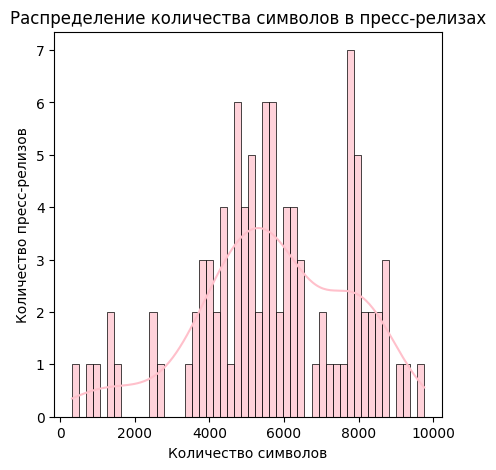

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['length_text']

def draw_hist_plot(df, col):
    plt.figure(figsize = (5, 5))
    sns.histplot(data=df, x=col, bins=50, color='pink', kde=True, alpha=0.7)
    plt.title(f'Распределение количества символов в пресс-релизах')
    plt.xlabel(f'Количество символов')
    plt.ylabel(f'Количество пресс-релизов')
    plt.show()


for i in numeric_cols:
    draw_hist_plot(df, i)

## 1.3. Частотный анализ слов и n-грамм, извлечение биграмм и триграмм, статистики по символам и словам, распределение частей речи.

### Частотный анализ слов

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download("punkt", quiet=True)

True

In [ ]:
# токенизируем тексты (оставим только слова без пунктуации)
texts = df['text']
texts_tokenized = [" ".join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]

texts_tokenized[0][:300]

'Совет директоров Банка России октября года принял решение повысить ключевую ставку на до годовых Инфляция складывается существенно выше июльского прогноза Банка России Продолжают увеличиваться инфляционные ожидания Рост внутреннего спроса значительно опережает возможности расширения предложения това'

In [ ]:
# лемматизируем тексты
from pymystem3 import Mystem

mystem_analyzer = Mystem()
texts_lemmatized = [mystem_analyzer.lemmatize(text) for text in texts_tokenized]
texts_lemmatized = [[j for j in i if j != ' ' and j != '\n'] for i in texts_lemmatized]

In [ ]:
texts_lemmatized[0][:10]

['совет',
 'директор',
 'банк',
 'россия',
 'октябрь',
 'год',
 'принимать',
 'решение',
 'повышать',
 'ключевой']

In [ ]:
texts_lemmatized = [" ".join([w for w in t]) for t in texts_lemmatized]

In [ ]:
# мешок слов
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(stop_words='english')

X = cnt_vec.fit_transform(texts_lemmatized)

In [ ]:
x = cnt_vec.vocabulary_
res = dict(sorted(x.items(), key=lambda item: item[1]))
#res.keys()

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 2, 0]])

In [ ]:
bag_of_words = pd.DataFrame(X.toarray(), columns=res.keys())
bag_of_words

,ii,iii,iv,urals,абсорбирование,август,автомобиль,агент,аграрный,агрегат,...,эпидемия,эпизод,этап,это,этот,эффект,эффективность,юридический,являться,январь
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,3,1,1,0,0,0,0
1,2,0,0,0,0,3,0,1,0,0,...,0,0,0,2,2,1,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,3,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,1,0,0,0,0,0,0,1,...,0,0,0,4,2,0,0,0,3,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,3,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,2,0


In [ ]:
bag_of_words.sum().sort_values()

соразмерный          1
отсутствовать        1
ископаемое           1
сформировывать       1
иран                 1
                  ... 
россия            1042
банк              1052
инфляция          1059
год               1213
на                2004
Length: 1460, dtype: int64

In [ ]:
bag_of_words.sum().sort_values(ascending=False)

на             2004
год            1213
инфляция       1059
банк           1052
россия         1042
               ... 
график            1
погашение         1
госконтракт       1
подорожать        1
отклоняться       1
Length: 1460, dtype: int64

In [ ]:
text = []
for i in texts_lemmatized:
    text = text + i.split()
len(text)

66826

In [ ]:
import nltk

text = nltk.Text(text)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [ ]:
fdist

FreqDist({'в': 3161, 'и': 2204, 'на': 2004, 'год': 1213, 'инфляция': 1059, 'банк': 1052, 'россия': 1042, 'с': 1012, 'рост': 915, 'по': 840, ...})

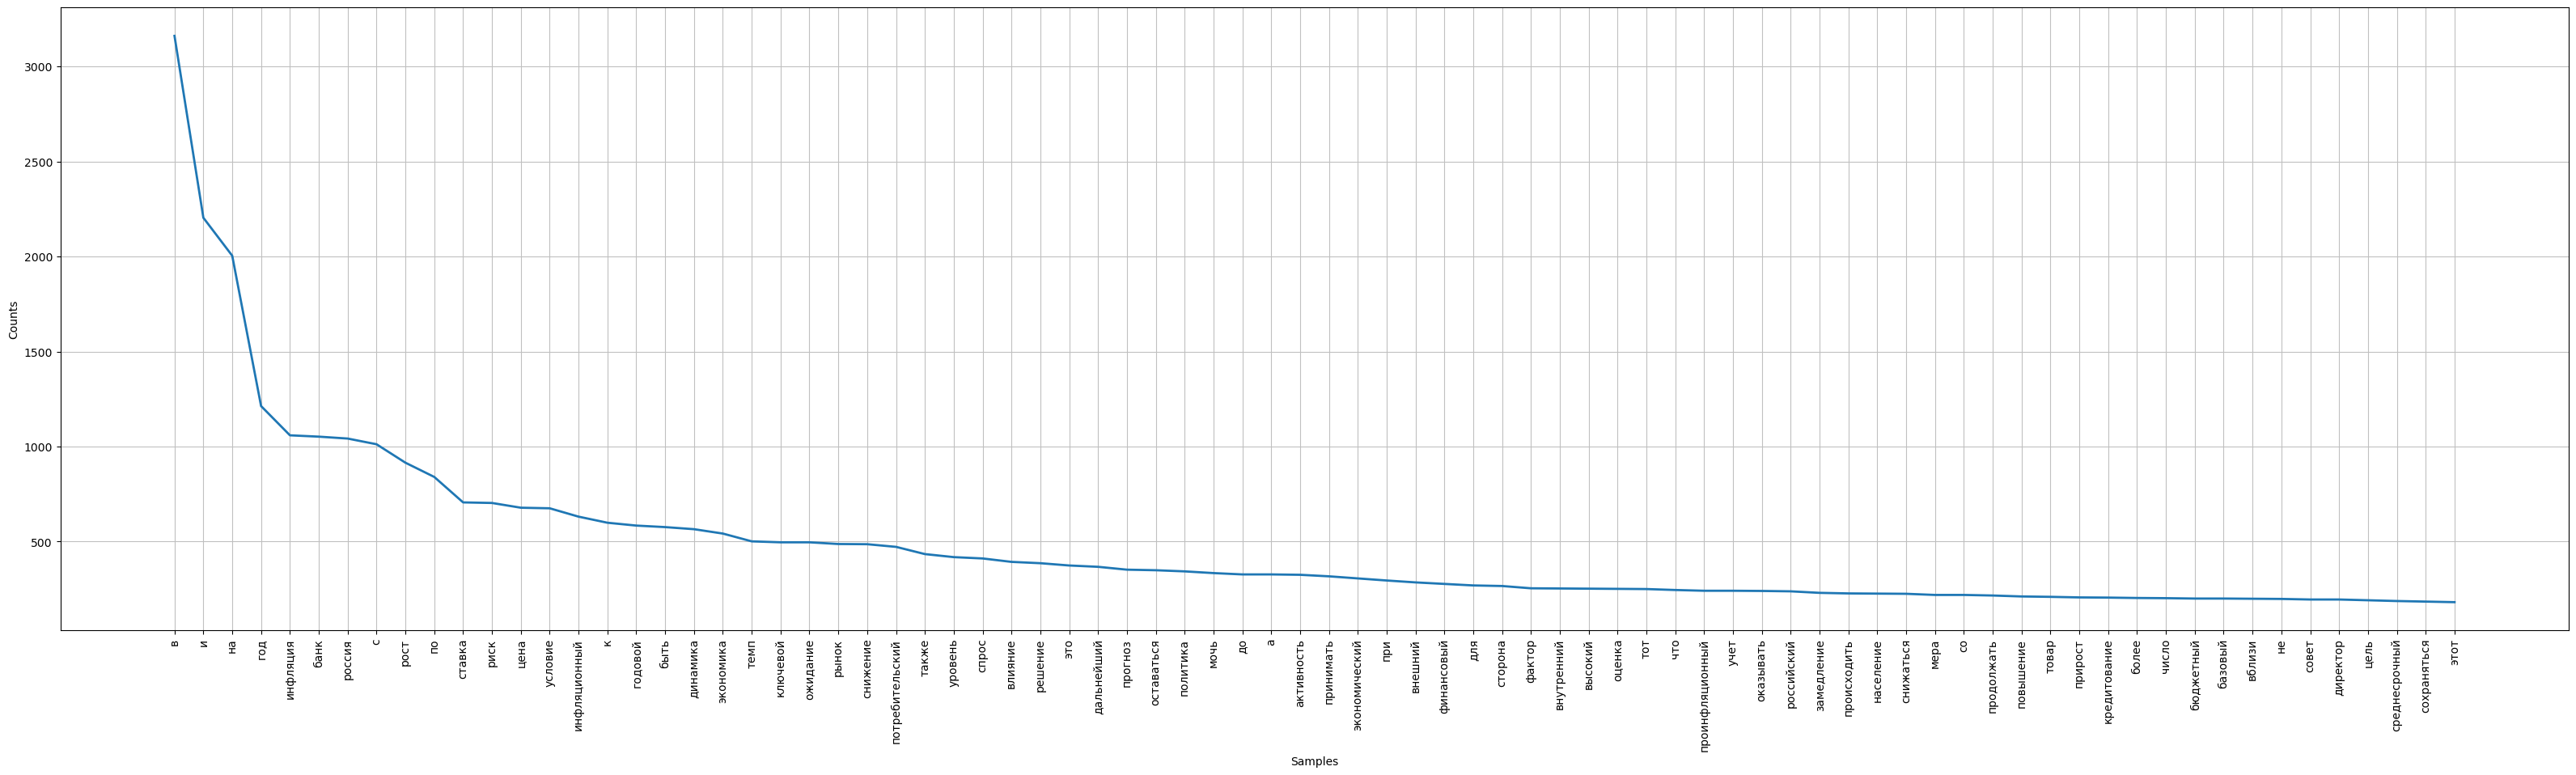

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 80 наиболее частотных слов
plt.figure(figsize = (40, 10))
fdist.plot(80, cumulative=False)

In [ ]:
# удалим стоп-слова и посмотрим, что выйдет
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [ ]:
text_stop = [i for i in text if i not in russian_stopwords]

In [ ]:
print(len(text), len(text_stop))

66826 51858


In [ ]:
import nltk

text_stop = nltk.Text(text_stop)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(text_stop)
fdist

FreqDist({'год': 1213, 'инфляция': 1059, 'банк': 1052, 'россия': 1042, 'рост': 915, 'ставка': 706, 'риск': 703, 'цена': 678, 'условие': 675, 'инфляционный': 631, ...})

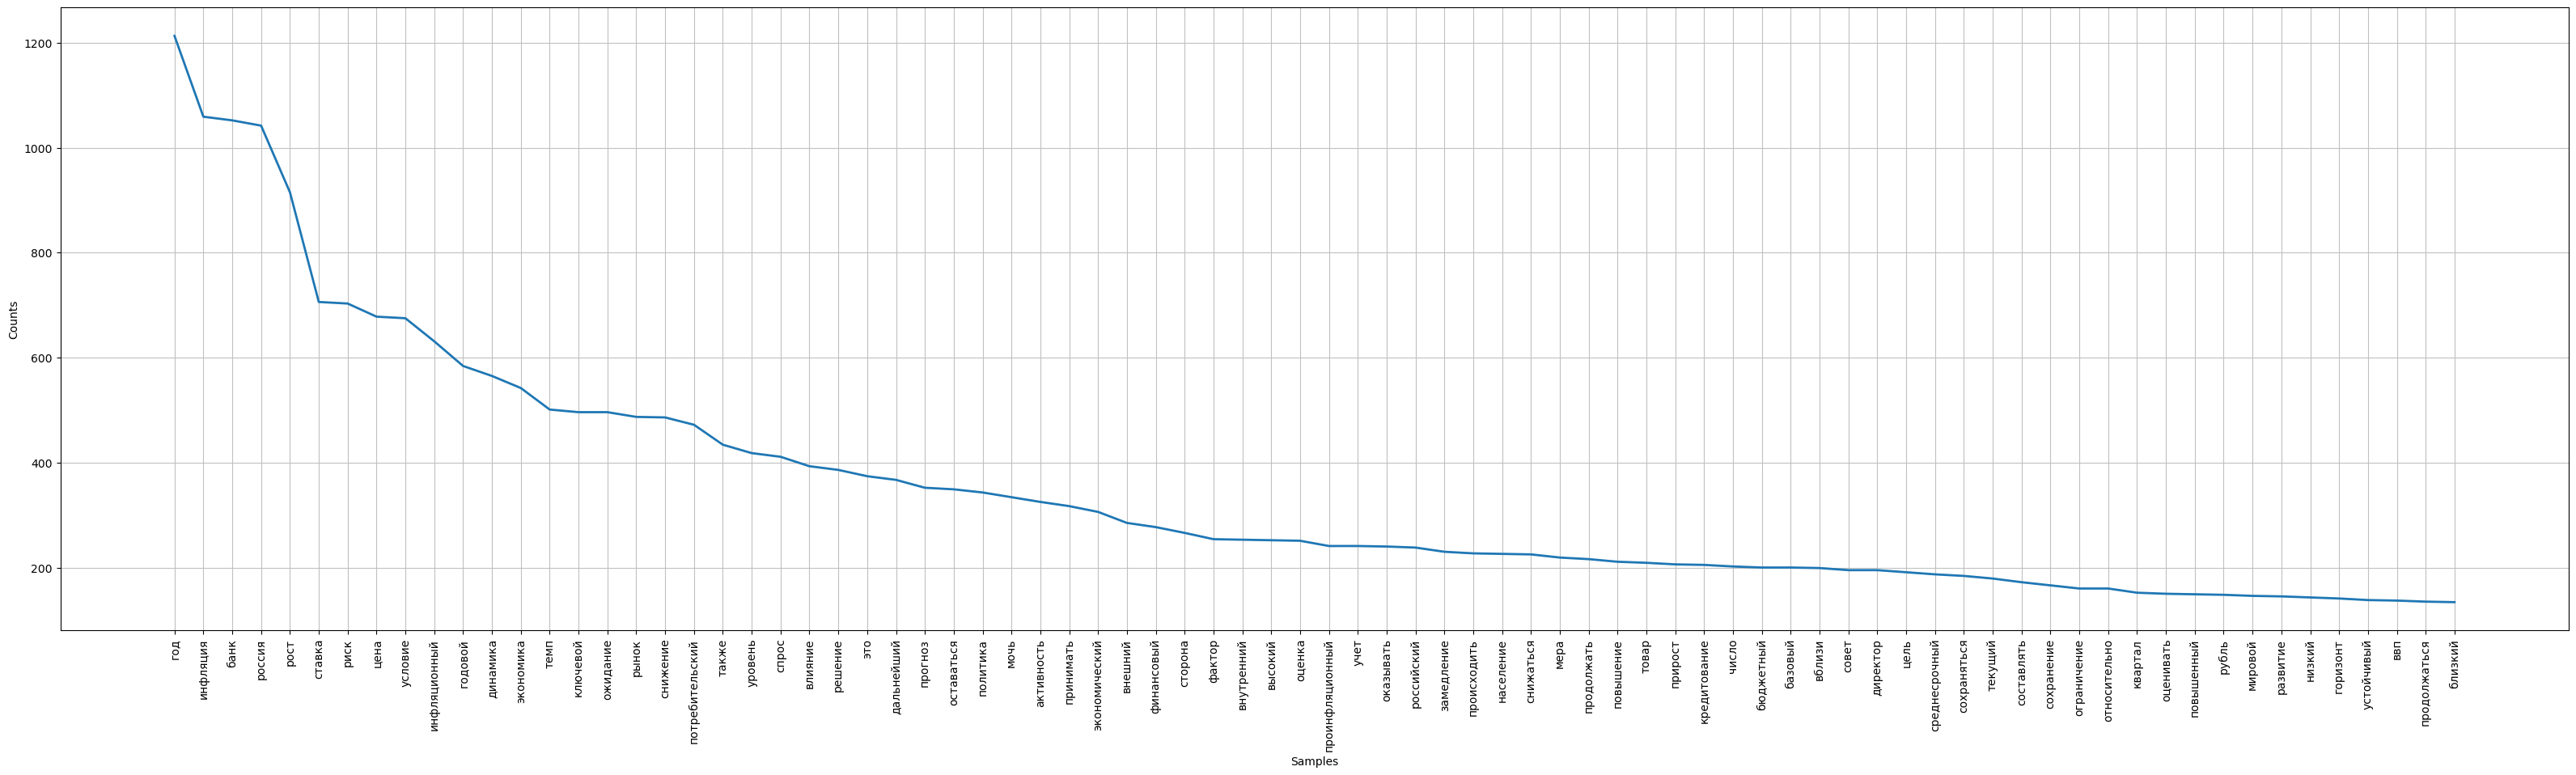

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 80 наиболее частотных слов после удаления стоп-слов
plt.figure(figsize = (40, 10))
fdist.plot(80,cumulative=False)

### Визуализация популярности слов в виде облака

In [ ]:
# pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
text_raw = " ".join(text_stop)

In [ ]:
wordcloud = WordCloud().generate(text_raw)

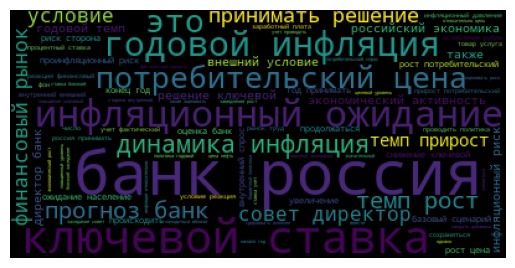

In [ ]:
plt.axis('off')
plt.imshow(wordcloud)

### Экспертно расширим список стоп-слов и ещё раз построим облако

In [ ]:
# удалим стоп-слова и посмотрим, что выйдет
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'совет', 'директор', 'банк', 'россия', 'годовой', 'год'])

text_stop = [i for i in text if i not in russian_stopwords]
print(len(text), len(text_stop))

66826 47203


In [ ]:
import nltk

text_stop = nltk.Text(text_stop)

from nltk.probability import FreqDist
fdist = FreqDist(text_stop)
fdist

FreqDist({'инфляция': 1059, 'рост': 915, 'ставка': 706, 'риск': 703, 'цена': 678, 'условие': 675, 'инфляционный': 631, 'динамика': 565, 'экономика': 542, 'темп': 501, ...})

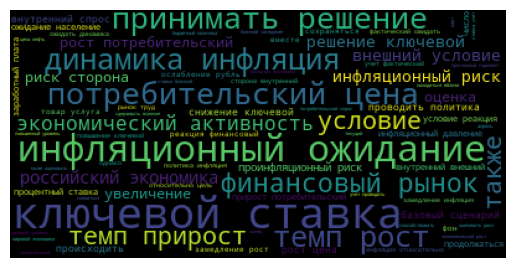

In [ ]:
text_raw = " ".join(text_stop)
wordcloud = WordCloud().generate(text_raw)
plt.axis('off')
plt.imshow(wordcloud)

### Морфология. Распределение частей речи.

In [ ]:
"""
pip install pymorphy2
pip install pymorphy2-dicts
pip install DAWG-Python

# на питон 3.11 работает только fork pymorphy3

pip install pymorphy3
pip install pymorphy3-dicts-ru
"""

'\npip install pymorphy2\npip install pymorphy2-dicts\npip install DAWG-Python\n\n# на питон 3.11 работает только fork pymorphy3\n\npip install pymorphy3\npip install pymorphy3-dicts-ru\n'

In [ ]:
import pymorphy3

In [ ]:
texts_tokenized = [i.lower().split() for i in texts_tokenized]

In [ ]:
parts_of_speech = dict()

In [ ]:
for i in texts_tokenized:
    for j in i:
        p = morph.parse(j)[0]
        p = p.tag.POS
        if p in parts_of_speech:
            parts_of_speech[p]+=1
        else:
            parts_of_speech[p]=1

In [ ]:
parts_of_speech

{'NOUN': 29812,
 'VERB': 4648,
 'INFN': 1210,
 'ADJF': 12320,
 'PREP': 10294,
 'ADVB': 1372,
 'CONJ': 3439,
 'NPRO': 636,
 'PRTF': 1156,
 'ADJS': 121,
 'GRND': 235,
 'PRCL': 882,
 'PRTS': 362,
 None: 226,
 'COMP': 72,
 'NUMR': 16,
 'PRED': 25}

In [ ]:
parts_of_speech.values()

dict_values([29812, 4648, 1210, 12320, 10294, 1372, 3439, 636, 1156, 121, 235, 882, 362, 226, 72, 16, 25])

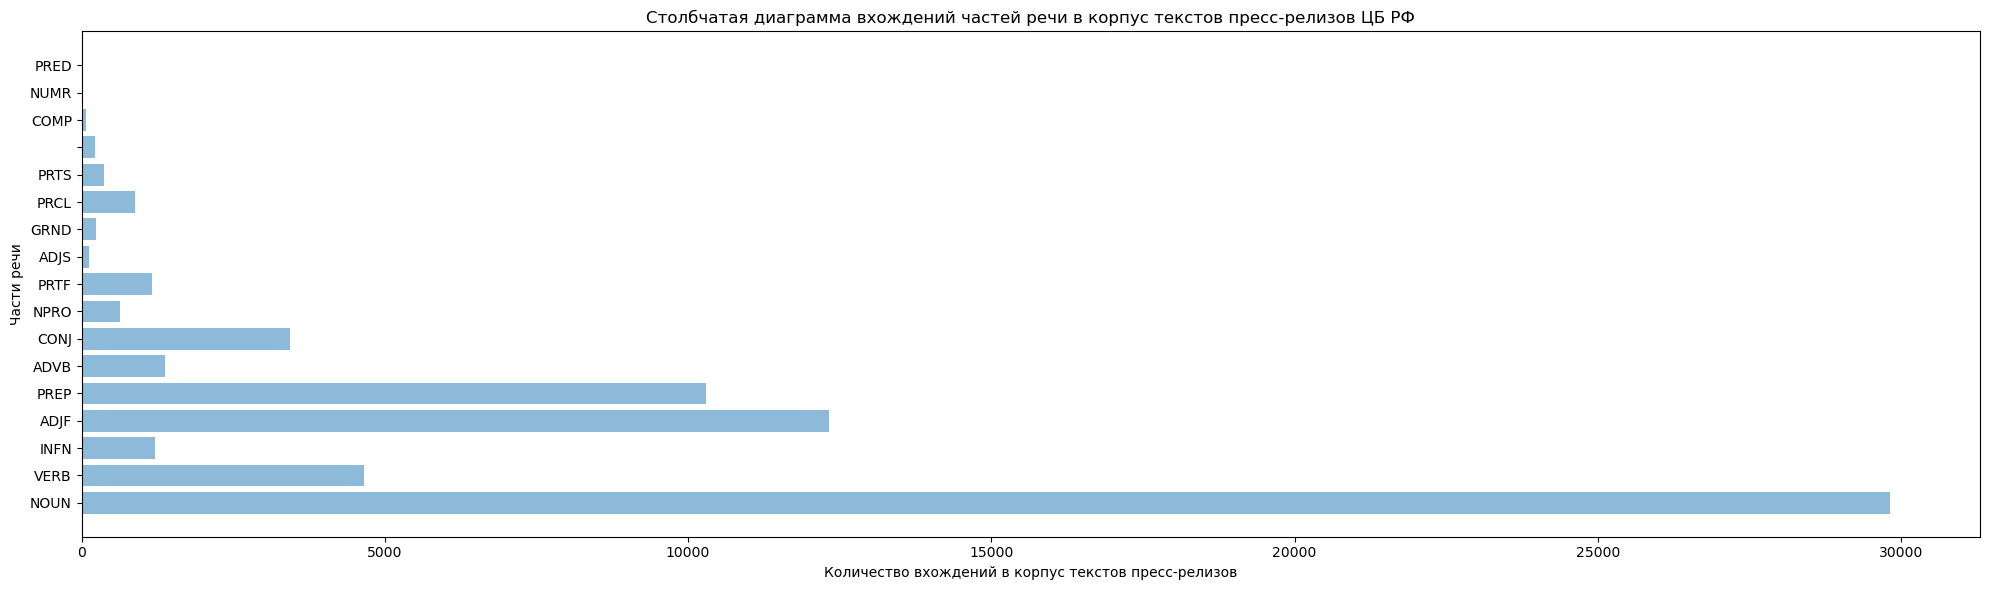

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_parts_of_speech(data):
    speech = data.keys()
    count = data.values()
    y_pos = np.arange(len(speech))
    plt.figure(figsize = (20, 6))
    plt.barh(y_pos, count, align='center', alpha=0.5)
    plt.yticks(y_pos, speech)
    plt.xlabel('Количество вхождений в корпус текстов пресс-релизов')
    plt.ylabel('Части речи')
    plt.title('Столбчатая диаграмма вхождений частей речи в корпус текстов пресс-релизов ЦБ РФ')
    plt.tight_layout()
    plt.show()

plot_parts_of_speech(parts_of_speech)

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(texts_lemmatized)

In [ ]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06677556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14979067, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.12942808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08522858,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08219492,
        0.        ]])

In [ ]:
pd.DataFrame(X.toarray(), columns=res.keys())

,ii,iii,iv,urals,абсорбирование,август,автомобиль,агент,аграрный,агрегат,...,эпидемия,эпизод,этап,это,этот,эффект,эффективность,юридический,являться,январь
0,0.000000,0.0,0.000000,0.0,0.0,0.087883,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.055427,0.021377,0.025422,0.0,0.0,0.000000,0.0
1,0.066776,0.0,0.000000,0.0,0.0,0.118386,0.000000,0.059001,0.0,0.00000,...,0.0,0.0,0.0,0.033185,0.038396,0.022831,0.0,0.0,0.000000,0.0
2,0.149791,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.064597,0.000000,0.0,0.0,0.000000,0.0
3,0.035622,0.0,0.000000,0.0,0.0,0.000000,0.081231,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.053108,0.020483,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.048669,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.061390,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
92,0.000000,0.0,0.044130,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.07807,...,0.0,0.0,0.0,0.074221,0.042938,0.000000,0.0,0.0,0.094891,0.0
93,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.025309,0.029283,0.000000,0.0,0.0,0.129428,0.0
94,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.074996,0.000000,0.000000,0.0,0.0,0.085229,0.0


### N-gram, извлечение биграмм и триграмм

In [ ]:
# Gensim
from numpy import triu
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
#pip install scipy==1.12

In [ ]:
#pip install gensim

In [ ]:
texts_lemmatized = [i.split() for i in texts_lemmatized]

In [ ]:
data_words = texts_tokenized

# строим модели биграмм и триграмм
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# пример триграммы для первого пресс-релиза
print(trigram_mod[bigram_mod[data_words[0]]])

['совет_директоров', 'банка', 'россии', 'октября', 'года', 'принял_решение', 'повысить_ключевую_ставку', 'на', 'до', 'годовых', 'инфляция', 'складывается', 'существенно', 'выше', 'июльского', 'прогноза', 'банка', 'россии', 'продолжают', 'увеличиваться', 'инфляционные', 'ожидания', 'рост', 'внутреннего', 'спроса', 'значительно', 'опережает_возможности_расширения', 'предложения', 'товаров', 'и', 'услуг', 'дополнительные', 'бюджетные', 'расходы', 'и', 'связанное', 'с', 'этим', 'расширение', 'дефицита', 'федерального_бюджета', 'в', 'году', 'имеют', 'проинфляционные', 'эффекты', 'требуется', 'дальнейшее', 'ужесточение', 'политики', 'для', 'того', 'чтобы', 'обеспечить', 'возвращение', 'инфляции', 'к', 'цели', 'и', 'снизить', 'инфляционные', 'ожидания', 'банк', 'россии', 'допускает_возможность', 'повышения', 'ключевой', 'ставки', 'на', 'ближайшем', 'заседании', 'по', 'прогнозу', 'банка', 'россии', 'с', 'учетом', 'проводимой', 'политики', 'годовая', 'инфляция', 'снизится', 'до', 'в', 'году', '

In [ ]:
bigram_mod[data_words[0]] # биграммы для первого пресс-релиза

['совет_директоров',
 'банка',
 'россии',
 'октября',
 'года',
 'принял_решение',
 'повысить_ключевую',
 'ставку',
 'на',
 'до',
 'годовых',
 'инфляция',
 'складывается',
 'существенно',
 'выше',
 'июльского',
 'прогноза',
 'банка',
 'россии',
 'продолжают',
 'увеличиваться',
 'инфляционные',
 'ожидания',
 'рост',
 'внутреннего',
 'спроса',
 'значительно',
 'опережает_возможности',
 'расширения',
 'предложения',
 'товаров',
 'и',
 'услуг',
 'дополнительные',
 'бюджетные',
 'расходы',
 'и',
 'связанное',
 'с',
 'этим',
 'расширение',
 'дефицита',
 'федерального_бюджета',
 'в',
 'году',
 'имеют',
 'проинфляционные',
 'эффекты',
 'требуется',
 'дальнейшее',
 'ужесточение',
 'политики',
 'для',
 'того',
 'чтобы',
 'обеспечить',
 'возвращение',
 'инфляции',
 'к',
 'цели',
 'и',
 'снизить',
 'инфляционные',
 'ожидания',
 'банк',
 'россии',
 'допускает_возможность',
 'повышения',
 'ключевой',
 'ставки',
 'на',
 'ближайшем',
 'заседании',
 'по',
 'прогнозу',
 'банка',
 'россии',
 'с',
 'учетом

## 2. Если у текстов есть метаинформация (дата публикации, авторство и т.д.), то проанализируйте атрибуты, изучите корреляции между этими признаками и текстами.

### Дата пресс-релиза поделена на три колонки:
- year
- month
- day

In [ ]:
df['year'].value_counts()

year
2022    11
2014    10
2023     9
2021     8
2020     8
2019     8
2018     8
2017     8
2016     8
2015     8
2024     7
2013     4
Name: count, dtype: int64

### Рассмотрим связь между годом и целевой переменной

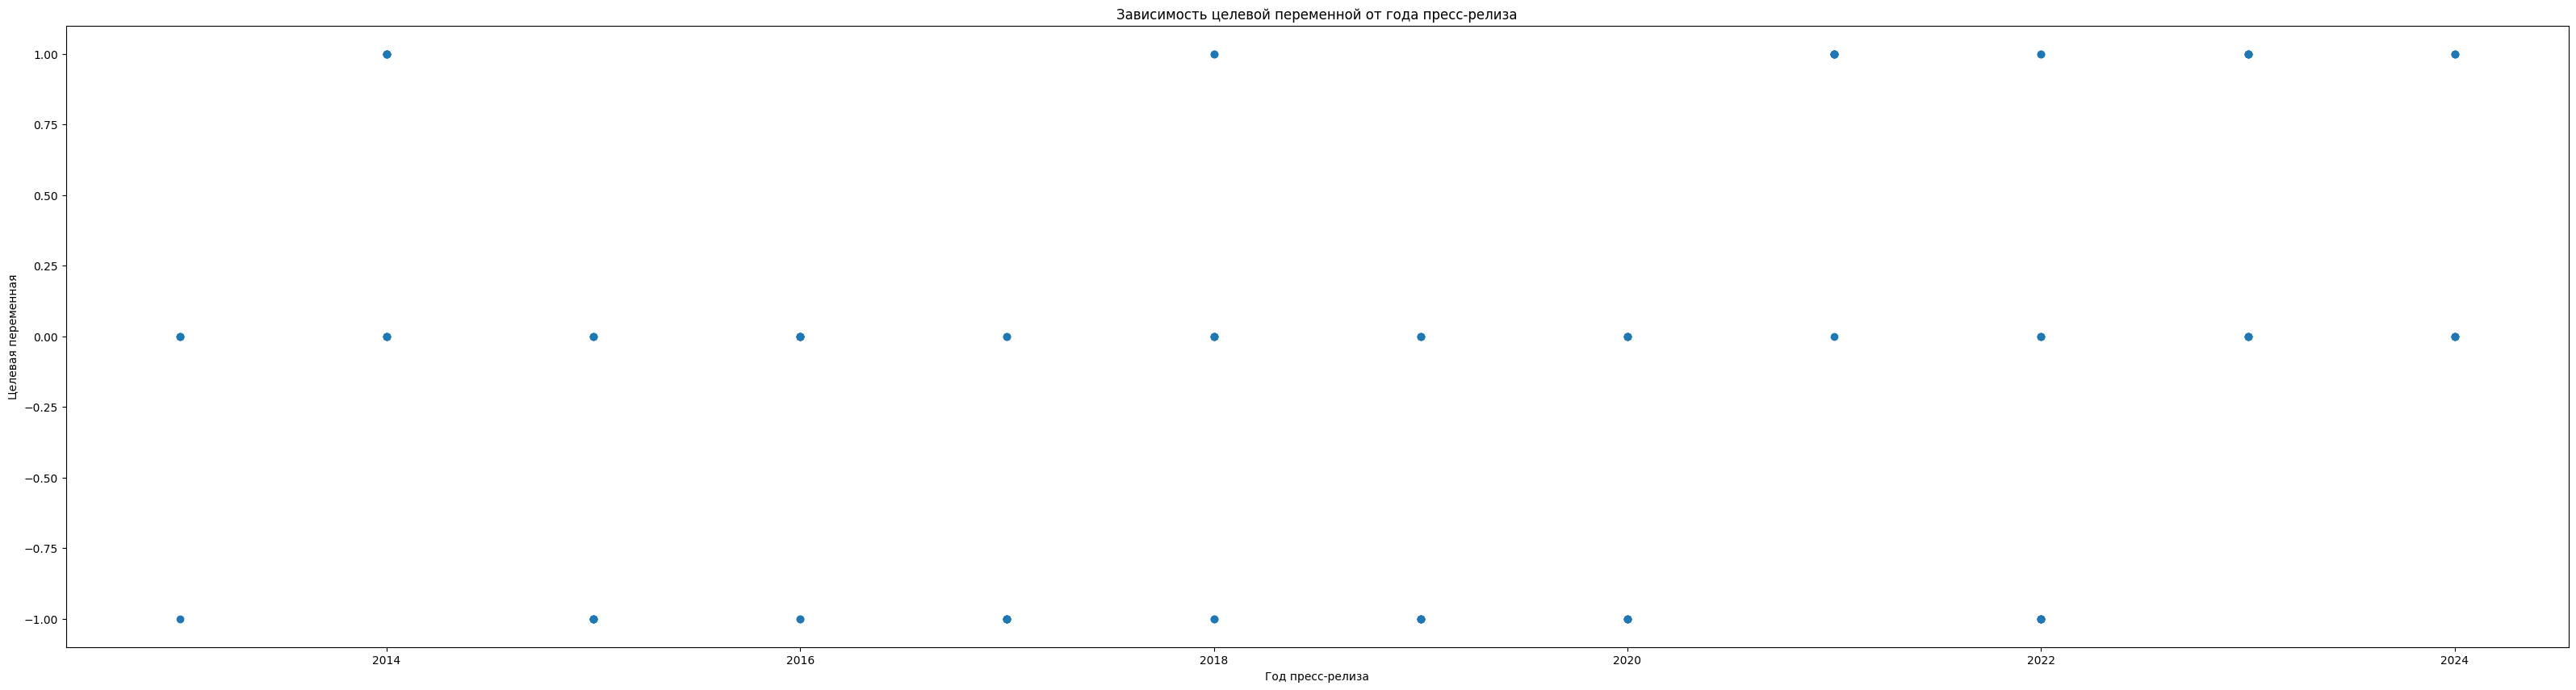

In [ ]:
plt.figure(figsize = (40, 10))
plt.title('Зависимость целевой переменной от года пресс-релиза')
plt.xlabel('Год пресс-релиза')
plt.ylabel('Целевая переменная')

plt.scatter(df['year'], df['target'])
plt.show()

### Распределения классов, меток или числовых признаков

In [ ]:
df.target.value_counts()

target
0     41
-1    31
1     25
Name: count, dtype: int64

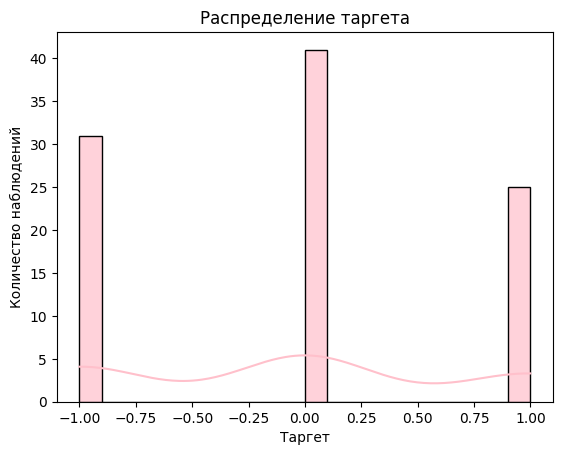

<Figure size 500x4000 with 0 Axes>

In [ ]:
sns.histplot(data=df, x='target', bins=20, color='pink', kde=True, alpha=0.7)
plt.title('Распределение таргета')
plt.xlabel('Таргет')
plt.ylabel('Количество наблюдений')
plt.figure(figsize = (5, 40))
plt.show()

### Понижение размерности

# Вывод о структуре данных
#### 1. Основная проблема данных - их **количество**. Поскольку пресс-релизы выходят приблизительно раз в один-два месяца, то с 2013 года их собралось менее 100. При обучении модели есть значительная вероятность, что данных не хватит, и тогда датафрейм придётся обогащать макроэкономическими данными.
#### 2. Другая проблема - содержание пресс-релизов. На данном этапе, например, непонятно, достаточно ли данные очищены от стоп-слов. Возможно, в дальнейшем придётся присваивать веса некоторым словам, по которым таргет определится с большей вероятностью.
#### 3. Из положительных моментов - значения классов в таргете примерно сбалансированы (41, 31, 25 для классов 0, -1, 1 соответственно).

Доработать:

● Изучить связь текстовых признаков с целевой переменной.
    
○ методы снижения размерности (например, t-SNE) для визуализации текстовых представлений.
    
● Оформить вывод о структуре данных, их особенностях и потенциальных проблемах на основе
проведенного разведочного анализа данных.